## Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

%matplotlib inline

## Importing the Dataset

In [3]:
deliveries = pd.read_csv('Dataset/deliveries.csv')
matches = pd.read_csv('Dataset/matches.csv')

## Exploratory Data Analysis

In [5]:
deliveries.head(10)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN


In [6]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [7]:
matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [24]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
matches_per_season = matches['season'].value_counts()
print(matches_per_season)

2013    76
2012    74
2011    73
2019    60
2018    60
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64


In [9]:
#Matches won without losing any wicket

matches[matches['win_by_wickets']==10]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan,NaN
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri,NaN
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,NaN
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper,NaN
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel,NaN
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin,NaN
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin,NaN
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi,NaN
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena,NaN


In [56]:
#List of different teams, stadiums i.e. venues and cities

print('Total no. of Teams: ', matches['team1'].nunique())
print('Total no. of Venue: ', matches['venue'].nunique())
print('Total no. of Cities: ', matches['city'].nunique())

Total no. of Teams:  15
Total no. of Venue:  41
Total no. of Cities:  32


In [15]:
matches['toss_decision'].value_counts()

field    463
bat      293
Name: toss_decision, dtype: int64

In [16]:
matches['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

Descriptive Stats:

In [38]:
print("Mean:\n",matches[['win_by_runs','win_by_wickets']].mean())

Mean:
 win_by_runs       13.283069
win_by_wickets     3.350529
dtype: float64


In [39]:
print("Median:\n",matches[['win_by_runs','win_by_wickets']].median())

Median:
 win_by_runs       0.0
win_by_wickets    4.0
dtype: float64


In [40]:
print("Standard Deviation:\n",matches[['win_by_runs','win_by_wickets']].std())

Standard Deviation:
 win_by_runs       23.471144
win_by_wickets     3.387963
dtype: float64


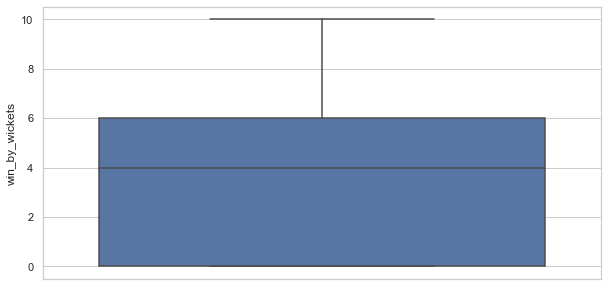

In [53]:
sb.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sb.boxplot(x='win_by_wickets', data=matches, orient='v')

In [54]:
print(matches[['win_by_runs', 'win_by_wickets']].describe())

       win_by_runs  win_by_wickets
count   756.000000      756.000000
mean     13.283069        3.350529
std      23.471144        3.387963
min       0.000000        0.000000
25%       0.000000        0.000000
50%       0.000000        4.000000
75%      19.000000        6.000000
max     146.000000       10.000000


## 1) How important is winning a toss in a match?

In [9]:
toss_and_match_winners = matches[matches['toss_winner']==matches['winner']]
season_wise_toss_and_match_winners = toss_and_match_winners.groupby('season')['season'].count()
season_wise_toss_and_match_winners

season
2008    28
2009    33
2010    31
2011    38
2012    33
2013    36
2014    30
2015    28
2016    34
2017    34
2018    32
2019    36
Name: season, dtype: int64

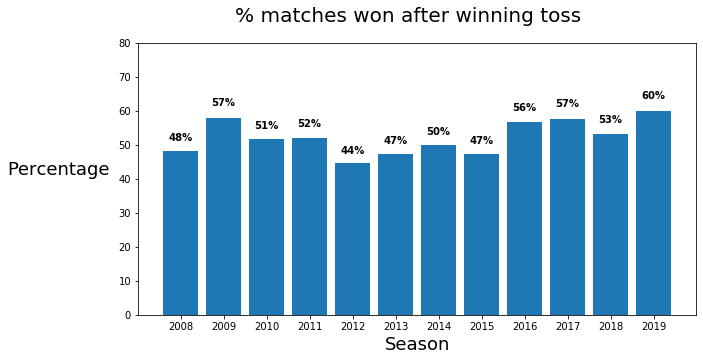

In [46]:
seasons = matches['season'].unique()
seasons.sort()

win_perc_per_season = []
for s in seasons:
    win_perc_per_season.append((season_wise_toss_and_match_winners[s]/matches_per_season[s])*100)


fig=plt.figure(figsize=(10,5))
plt.ylim(0,80)
rects=plt.bar(seasons,win_perc_per_season)
plt.xticks(seasons)

for rect in rects:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2., 1.05*height, str(int(height))+"%",ha='center', va='bottom',color='black',fontweight='bold')
    
fig.suptitle('% matches won after winning toss',fontsize=20)
plt.xlabel('Season', fontsize=18)
plt.ylabel('Percentage', fontsize=18,rotation=0,labelpad=60)

plt.show()

In [44]:
stadiums = matches['venue'].unique()
temp1 = []
temp2 = []
for i in stadiums :
    for j in teams :
        temp = matches.loc[(matches['toss_winner']==j)&(matches['winner']==j)&(matches['venue']==i),:].shape[0]
        temp1.append(temp)
    temp2.append(temp1)
    temp1 = []
toss_win_count_per_team_per_stadium = pd.DataFrame(temp2, columns = teams).set_index(stadiums)
toss_win_count_per_team_per_stadium

,Sunrisers Hyderabad,Mumbai Indians,Gujarat Lions,Rising Pune Supergiant,Royal Challengers Bangalore,Kolkata Knight Riders,Delhi Daredevils,Kings XI Punjab,Chennai Super Kings,Rajasthan Royals,Deccan Chargers,Kochi Tuskers Kerala,Pune Warriors,Rising Pune Supergiants,Delhi Capitals
"Rajiv Gandhi International Stadium, Uppal",9,1,0,0,0,1,2,3,0,2,0,0,0,1,0
Maharashtra Cricket Association Stadium,0,2,1,4,1,3,0,0,3,0,0,0,0,0,0
Saurashtra Cricket Association Stadium,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0
Holkar Cricket Stadium,0,2,0,0,1,0,0,3,0,0,0,1,0,0,0
M Chinnaswamy Stadium,2,6,1,0,15,5,2,3,3,2,1,0,0,0,0
Wankhede Stadium,0,23,1,0,2,0,2,0,5,2,1,1,0,0,0
Eden Gardens,1,4,2,1,3,24,1,1,3,2,0,0,0,0,1
Feroz Shah Kotla,2,0,0,0,4,1,13,2,4,3,2,1,0,1,0
"Punjab Cricket Association IS Bindra Stadium, Mohali",0,0,2,0,0,1,0,3,0,0,0,0,0,0,0
Green Park,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0


In [62]:
team_1 = matches['team1'].groupby(matches['team1']).agg('count')
team_1

team1
Chennai Super Kings             89
Deccan Chargers                 43
Delhi Capitals                   6
Delhi Daredevils                72
Gujarat Lions                   14
Kings XI Punjab                 91
Kochi Tuskers Kerala             7
Kolkata Knight Riders           83
Mumbai Indians                 101
Pune Warriors                   20
Rajasthan Royals                67
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Royal Challengers Bangalore     85
Sunrisers Hyderabad             63
Name: team1, dtype: int64

In [63]:
team_2 = matches['team2'].groupby(matches['team2']).agg('count')
team_2

team2
Chennai Super Kings            75
Deccan Chargers                32
Delhi Capitals                 10
Delhi Daredevils               89
Gujarat Lions                  16
Kings XI Punjab                85
Kochi Tuskers Kerala            7
Kolkata Knight Riders          95
Mumbai Indians                 86
Pune Warriors                  26
Rajasthan Royals               80
Rising Pune Supergiant          8
Rising Pune Supergiants         7
Royal Challengers Bangalore    95
Sunrisers Hyderabad            45
Name: team2, dtype: int64

In [64]:
total_matches = Team_1 + Team_2
total_matches

team1
Chennai Super Kings            164
Deccan Chargers                 75
Delhi Capitals                  16
Delhi Daredevils               161
Gujarat Lions                   30
Kings XI Punjab                176
Kochi Tuskers Kerala            14
Kolkata Knight Riders          178
Mumbai Indians                 187
Pune Warriors                   46
Rajasthan Royals               147
Rising Pune Supergiant          16
Rising Pune Supergiants         14
Royal Challengers Bangalore    180
Sunrisers Hyderabad            108
dtype: int64

In [65]:
toss_winners = matches['toss_winner'].groupby(matches['toss_winner']).agg('count')
toss_winners

toss_winner
Chennai Super Kings            89
Deccan Chargers                43
Delhi Capitals                 10
Delhi Daredevils               80
Gujarat Lions                  15
Kings XI Punjab                81
Kochi Tuskers Kerala            8
Kolkata Knight Riders          92
Mumbai Indians                 98
Pune Warriors                  20
Rajasthan Royals               80
Rising Pune Supergiant          6
Rising Pune Supergiants         7
Royal Challengers Bangalore    81
Sunrisers Hyderabad            46
Name: toss_winner, dtype: int64

In [66]:
toss_win_pct = (Toss_Winners/Total_Matches)*100
toss_win_pct

toss_winner
Chennai Super Kings            54.268293
Deccan Chargers                57.333333
Delhi Capitals                 62.500000
Delhi Daredevils               49.689441
Gujarat Lions                  50.000000
Kings XI Punjab                46.022727
Kochi Tuskers Kerala           57.142857
Kolkata Knight Riders          51.685393
Mumbai Indians                 52.406417
Pune Warriors                  43.478261
Rajasthan Royals               54.421769
Rising Pune Supergiant         37.500000
Rising Pune Supergiants        50.000000
Royal Challengers Bangalore    45.000000
Sunrisers Hyderabad            42.592593
dtype: float64

In [67]:
match_winners = matches['winner'].groupby(matches['winner']).agg('count')
match_winners

winner
Chennai Super Kings            100
Deccan Chargers                 29
Delhi Capitals                  10
Delhi Daredevils                67
Gujarat Lions                   13
Kings XI Punjab                 82
Kochi Tuskers Kerala             6
Kolkata Knight Riders           92
Mumbai Indians                 109
Pune Warriors                   12
Rajasthan Royals                75
Rising Pune Supergiant          10
Rising Pune Supergiants          5
Royal Challengers Bangalore     84
Sunrisers Hyderabad             58
Name: winner, dtype: int64

In [68]:
toss_and_match_winners = matches['team1'].groupby([matches['winner'],matches['toss_winner']]).agg('count')
temp = toss_and_match_winners.reset_index()
toss_stats = temp.loc[temp['winner'] == temp['toss_winner']]
toss_stats['Team'] = toss_winners.to_numpy()
toss_stats = toss_stats.drop(columns=['winner'])
toss_stats.columns = ['Team','Toss and Match Wins','Toss Wins']
toss_stats['Match_Winning_Probability_On_Winning_Toss'] = (toss_stats['Toss and Match Wins']/toss_stats['Toss Wins'])*100
toss_stats['total_matches']= total_matches.to_numpy()
toss_stats['Toss_Win_%'] = toss_win_pct.to_numpy()
toss_stats['Match_and_Toss_Win_%'] = (toss_stats['Toss and Match Wins']/toss_stats['total_matches']) *100

toss_stats

C:\Users\268742\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Team,Toss and Match Wins,Toss Wins,Match_Winning_Probability_On_Winning_Toss,total_matches,Toss_Win_%,Match_and_Toss_Win_%
0,Chennai Super Kings,57,89,64.044944,164,54.268293,34.756098
12,Deccan Chargers,19,43,44.186047,75,57.333333,25.333333
18,Delhi Capitals,7,10,70.000000,16,62.500000,43.750000
24,Delhi Daredevils,35,80,43.750000,161,49.689441,21.739130
33,Gujarat Lions,10,15,66.666667,30,50.000000,33.333333
41,Kings XI Punjab,35,81,43.209877,176,46.022727,19.886364
49,Kochi Tuskers Kerala,4,8,50.000000,14,57.142857,28.571429
55,Kolkata Knight Riders,53,92,57.608696,178,51.685393,29.775281
67,Mumbai Indians,56,98,57.142857,187,52.406417,29.946524
79,Pune Warriors,3,20,15.000000,46,43.478261,6.521739


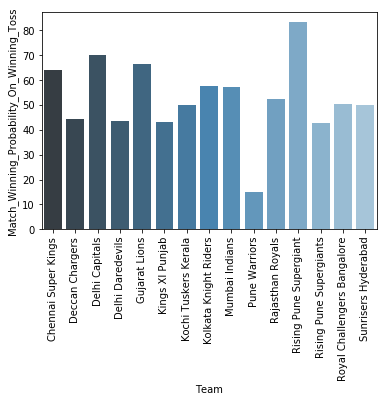

In [70]:
ax = sb.barplot(toss_stats['Team'], toss_stats['Match_Winning_Probability_On_Winning_Toss'], palette="Blues_d").set_xticklabels(toss_stats['Team'], rotation=90)

## 2) Run rate statistics

In [71]:
balls = deliveries.groupby(deliveries['match_id']).agg('count')
balls = balls.reset_index()

runs = deliveries.groupby(deliveries['match_id']).sum()
runs = runs.reset_index()

run_rate_stats = pd.DataFrame(balls.match_id)
run_rate_stats['runs'] = runs['total_runs']
run_rate_stats['over'] = balls['over']/6
run_rate_stats['run_rate'] = run_rate_stats['runs'] / run_rate_stats['over']
run_rate_stats

,match_id,runs,over,run_rate
0,1,379,41.333333,9.169355
1,2,371,41.166667,9.012146
2,3,367,36.333333,10.100917
3,4,327,41.166667,7.943320
4,5,299,41.333333,7.233871
...,...,...,...,...
751,11347,280,38.000000,7.368421
752,11412,276,39.500000,6.987342
753,11413,341,42.000000,8.119048
754,11414,317,39.833333,7.958159


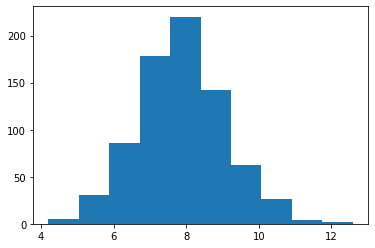

In [72]:
plt.hist(run_rate_stats['run_rate'])
plt.show()

Normally distributed

In [73]:
run_rate_stats.describe()

,match_id,runs,over,run_rate
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,311.230159,39.479277,7.878464
std,3464.478148,57.430545,3.848713,1.211347
min,1.000000,56.000000,8.500000,4.205607
25%,189.750000,279.000000,39.291667,7.093182
50%,378.500000,314.500000,40.666667,7.857442
75%,567.250000,349.000000,41.333333,8.657803
max,11415.000000,471.000000,44.500000,12.588235


In [61]:
runs_made = deliveries.groupby(deliveries['batsman']).agg('sum')
runs_made.head()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
batsman,,,,,,,,,,,,,
A Ashish Reddy,90024,277,3312,720,0,3,5,0,0,0,280,8,288
A Chandila,2815,7,132,23,0,0,0,0,0,0,4,0,4
A Chopra,7602,78,467,273,0,4,0,1,0,0,53,5,58
A Choudhary,614,28,371,71,0,0,0,0,0,0,25,0,25
A Dananjaya,39510,5,97,22,0,0,0,0,0,0,4,0,4


In [75]:
batting_first = matches[matches['win_by_wickets']==0]
batting_second = matches[matches['win_by_runs']==0]

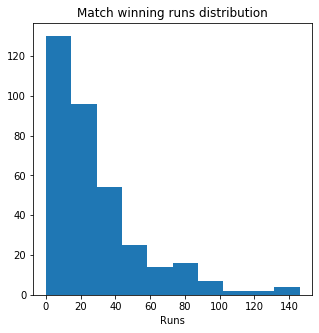

In [77]:
plt.figure(figsize=(5,5))
plt.hist(batting_first['win_by_runs'])
plt.title("Match winning runs distribution")
plt.xlabel("Runs")
plt.show()

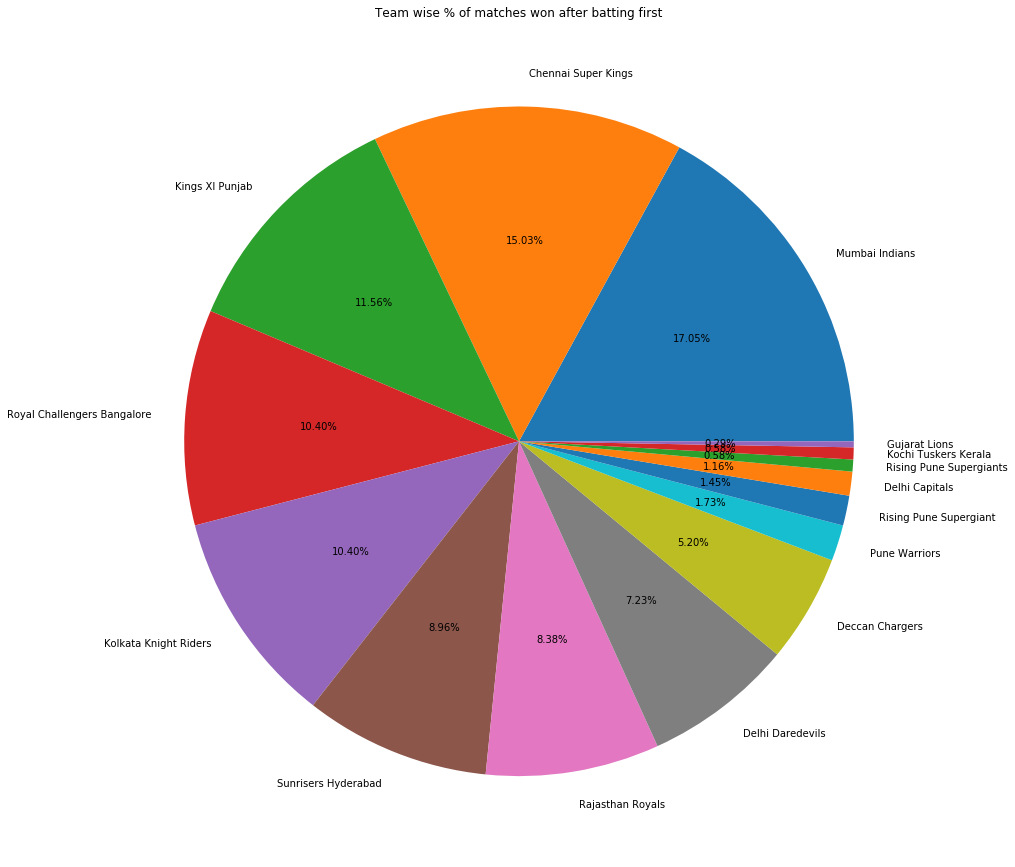

In [94]:
plt.figure(figsize=(15,20))
plt.pie(list(batting_first['winner'].value_counts()), labels=list(batting_first['winner'].value_counts().keys()), autopct='%0.2f%%')
plt.title("Team wise % of matches won after batting first")
plt.show()

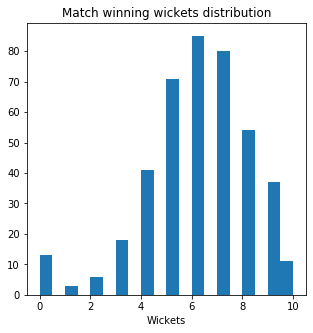

In [101]:
plt.figure(figsize=(5,5))
plt.hist(batting_second['win_by_wickets'],bins=20)
plt.title("Match winning wickets distribution")
plt.xlabel("Wickets")
plt.show()

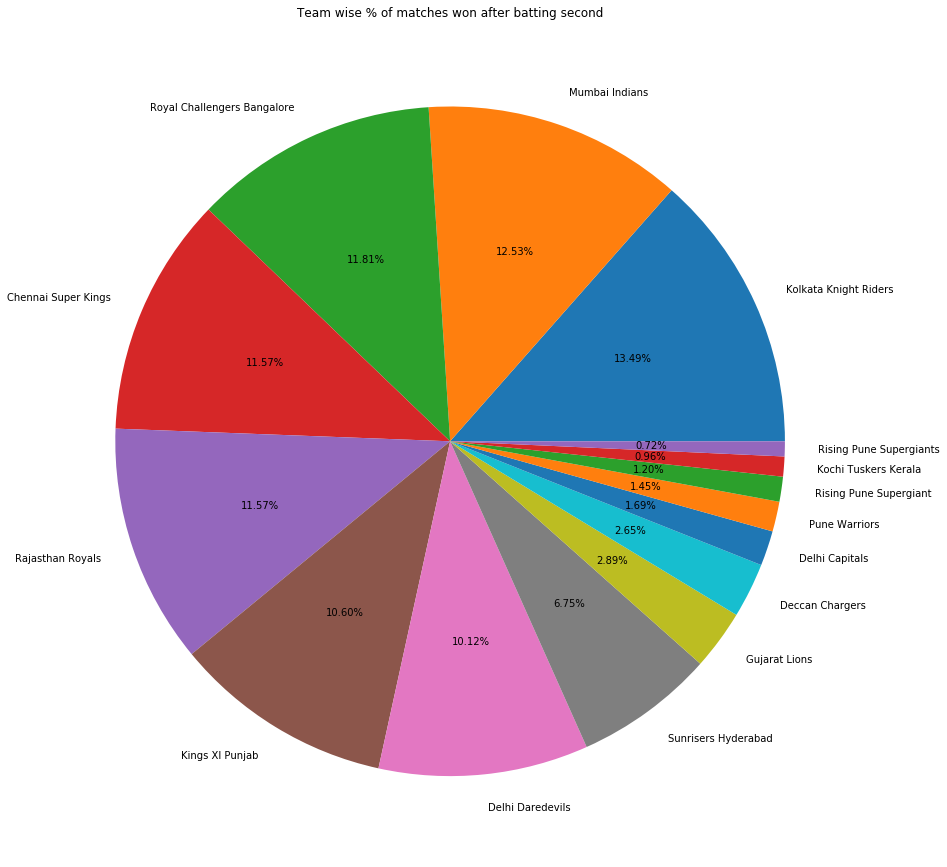

In [102]:
plt.figure(figsize=(15,20))
plt.pie(list(batting_second['winner'].value_counts()), labels=list(batting_second['winner'].value_counts().keys()), autopct='%0.2f%%')
plt.title("Team wise % of matches won after batting second")
plt.show()

## Predictive Analytics

In [14]:
#Converting the string values into numeric categorical values
encoder = preprocessing.LabelEncoder()
matches["team1"] = encoder.fit_transform(matches["team1"])
matches["team2"] = encoder.fit_transform(matches["team2"])
matches["winner"] = encoder.fit_transform(matches["winner"].astype(str))
matches["toss_winner"] = encoder.fit_transform(matches["toss_winner"])
matches["venue"] = encoder.fit_transform(matches["venue"])

In [15]:
#Variable team1_win = probability of team1 winning the match
matches.loc[matches["winner"]==matches["team1"],"team1_win"] = 1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"] = 0

#Variable team1_toss_win = team1 winning the toss
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"] = 1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"] = 0

#Variable team1_bat = team1 winning the toss and choosing to bat
matches["team1_bat"] = 0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"] = 1

#Dataframe of features selected for prediction analysis
prediction_features = matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]

#Checking for correlation among the features
correlated_features = set()
correlation_matrix = prediction_features.drop('team1_win', axis=1).corr()
correlation_matrix

,team1,team2,team1_toss_win,team1_bat,venue
team1,1.000000,-0.105600,-0.122089,-0.122089,0.104323
team2,-0.105600,1.000000,-0.010807,-0.010807,0.075024
team1_toss_win,-0.122089,-0.010807,1.000000,1.000000,0.049083
team1_bat,-0.122089,-0.010807,1.000000,1.000000,0.049083
venue,0.104323,0.075024,0.049083,0.049083,1.000000


In [16]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)

#Dropping team1_bat feature as both team1_toss_win and team1_bat columns represent the same values (i.e. correlation coeff. of 1)
prediction_features.drop(columns=correlated_features)

x = prediction_features.drop('team1_win', axis=1)
target = prediction_features['team1_win']
target=target.astype(int)

In [17]:
#Splitting the data into training and test data with a proportion of 70:30
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size=0.3, random_state=0)
sc = preprocessing.StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [23]:
#Applying Support Vector Classifier 
svm = SVC()
svm.fit(x_train,y_train)
svm.score(x_test,y_test)
y_pred = svm.predict(x_test)
print(classification_report(y_test,y_pred))


#Applying Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test,y_pred))


#Applying Random Forest Classifier
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(x_train,y_train)
y_pred = randomForest.predict(x_test)
print(classification_report(y_test,y_pred))



print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm.score(x_test, y_test)))
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(randomForest.score(x_test, y_test)))

              precision    recall  f1-score   support

           0       0.59      0.91      0.72       129
           1       0.58      0.15      0.24        98

    accuracy                           0.59       227
   macro avg       0.58      0.53      0.48       227
weighted avg       0.58      0.59      0.51       227

              precision    recall  f1-score   support

           0       0.54      0.88      0.67       129
           1       0.11      0.02      0.03        98

    accuracy                           0.51       227
   macro avg       0.33      0.45      0.35       227
weighted avg       0.36      0.51      0.39       227

              precision    recall  f1-score   support

           0       0.60      0.64      0.62       129
           1       0.48      0.45      0.47        98

    accuracy                           0.56       227
   macro avg       0.54      0.54      0.54       227
weighted avg       0.55      0.56      0.55       227

Accuracy of SVM cla

In [18]:
#Applying Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print(classification_report(y_test,y_pred))
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

              precision    recall  f1-score   support

           0       0.54      0.88      0.67       129
           1       0.11      0.02      0.03        98

    accuracy                           0.51       227
   macro avg       0.33      0.45      0.35       227
weighted avg       0.36      0.51      0.39       227

Accuracy of Logistic Regression Classifier on test set: 0.51


In [19]:
#Applying Random Forest Classifier
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(x_train,y_train)
y_pred = randomForest.predict(x_test)
print(classification_report(y_test,y_pred))
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(randomForest.score(x_test, y_test)))

              precision    recall  f1-score   support

           0       0.63      0.64      0.63       129
           1       0.51      0.50      0.51        98

    accuracy                           0.58       227
   macro avg       0.57      0.57      0.57       227
weighted avg       0.58      0.58      0.58       227

Accuracy of Random Forest Classifier on test set: 0.58
